# Clusters
Este modulo contiene un conjunto de distintos ejemplos de clusterizaciones, nos sirve para mostrar el potencial de nbdev y como generar software de forma consistente. 

In [1]:
#| default_exp Cluster_ejemplo

In [2]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

# Clase para generar puntos geométricos. 
Vamos hacer una clase para que contenga puntos y que sean ya geometrías. 

In [144]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)

        Xpoint = np.random.uniform(low= min_x, high= max_x, size=n)
        Ypoint = np.random.uniform(low= min_y, high= max_y, size=n)
        
        #self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2))
        self.Points =  [shapely.Point(x[0],x[1]) for x in zip(Xpoint, Ypoint)]
    
    @classmethod
    def from_list(cls, list_points):
        """Se genera los datos usando una lista de puntos"""
        toto = cls(0)
        toto.Points = list_points
        return toto
    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays

    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    
    

In [145]:
#| hide
datos_simples = data_points(40)


In [146]:
#| hide
datos_simples.get_points()

[<POINT (0.823 0.582)>,
 <POINT (0.591 0.735)>,
 <POINT (0.276 0.037)>,
 <POINT (0.401 0.983)>,
 <POINT (0.314 0.968)>,
 <POINT (0.871 0.128)>,
 <POINT (0.405 0.85)>,
 <POINT (0.76 0.353)>,
 <POINT (0.557 0.772)>,
 <POINT (0.498 0.41)>,
 <POINT (0.192 0.432)>,
 <POINT (0.8 0.835)>,
 <POINT (0.084 0.617)>,
 <POINT (0.223 0.102)>,
 <POINT (0.51 0.333)>,
 <POINT (0.747 0.703)>,
 <POINT (0.483 0.617)>,
 <POINT (0.594 0.305)>,
 <POINT (0.14 0.682)>,
 <POINT (0.617 0.76)>,
 <POINT (0.214 0.036)>,
 <POINT (0.157 0.313)>,
 <POINT (0.412 0.787)>,
 <POINT (0.328 0.266)>,
 <POINT (0.71 0.93)>,
 <POINT (0.554 0.47)>,
 <POINT (0.598 0.508)>,
 <POINT (0.926 0.758)>,
 <POINT (0.865 0.833)>,
 <POINT (0.879 0.8)>,
 <POINT (0.708 0.882)>,
 <POINT (0.463 0.173)>,
 <POINT (0.57 0.467)>,
 <POINT (0.751 0.111)>,
 <POINT (0.177 0.263)>,
 <POINT (0.646 0.666)>,
 <POINT (0.72 0.327)>,
 <POINT (0.624 0.182)>,
 <POINT (0.04 0.431)>,
 <POINT (0.418 0.826)>]

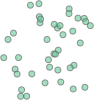

In [147]:
#| hide
datos_simples.get_Multypoint()

In [148]:
#| hide
datos_simples.get_X()

[0.8232522706602146,
 0.5910704986455082,
 0.275615966231903,
 0.4008874177213676,
 0.31353800890378003,
 0.8707503951747979,
 0.40479906044547687,
 0.7597649683524731,
 0.5570140900490751,
 0.4979441571734854,
 0.19193432509765684,
 0.8001292888339974,
 0.08434131193143046,
 0.2229163949438766,
 0.5096891794541883,
 0.7470652235383614,
 0.4830819377283053,
 0.5943713658023012,
 0.13997691085049035,
 0.6165858798105364,
 0.21352184066568225,
 0.15691175697594695,
 0.41168904754775926,
 0.32797998993551436,
 0.7099371412822856,
 0.5538479861381932,
 0.5983231256668212,
 0.9262955234379943,
 0.8646183152755079,
 0.8793502380806347,
 0.7078501804726843,
 0.4632609162444977,
 0.5695902051197783,
 0.7513030106084996,
 0.1773517939593221,
 0.646198675540713,
 0.7201880497128135,
 0.6242131263641852,
 0.04010967819303812,
 0.41796621334244066]

In [149]:
#| hide
#| output: false
datos_simples.get_Y()

[0.5815891331910426,
 0.7346026446563495,
 0.03670182917756992,
 0.9832699206001764,
 0.9678493966569183,
 0.1278871326015868,
 0.8502788088317167,
 0.35292839948263677,
 0.7723992043990543,
 0.4099435747631809,
 0.4318595194601751,
 0.8352650280804392,
 0.6172695339574614,
 0.10237780188904155,
 0.3333146849329036,
 0.7027409615925824,
 0.6172553018502794,
 0.30463829696046596,
 0.6823063113999938,
 0.7595529955509486,
 0.0357279057172224,
 0.31309631151133166,
 0.7873376201238663,
 0.2655428212306401,
 0.9304039013545417,
 0.4698615391786807,
 0.5075165731799925,
 0.7584656132906592,
 0.8329127199344025,
 0.8001076643230918,
 0.882380388789274,
 0.17320573897805325,
 0.4672308672744604,
 0.110664535470132,
 0.2630942841348972,
 0.6657038891472759,
 0.327127848896823,
 0.18161999301840004,
 0.43096530575050707,
 0.8260765339008909]

In [150]:
#| hide
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

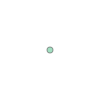

In [151]:
#| hide
data_points(10).centroid()

In [152]:
#| hide 
datos_simples.Points

[<POINT (0.823 0.582)>,
 <POINT (0.591 0.735)>,
 <POINT (0.276 0.037)>,
 <POINT (0.401 0.983)>,
 <POINT (0.314 0.968)>,
 <POINT (0.871 0.128)>,
 <POINT (0.405 0.85)>,
 <POINT (0.76 0.353)>,
 <POINT (0.557 0.772)>,
 <POINT (0.498 0.41)>,
 <POINT (0.192 0.432)>,
 <POINT (0.8 0.835)>,
 <POINT (0.084 0.617)>,
 <POINT (0.223 0.102)>,
 <POINT (0.51 0.333)>,
 <POINT (0.747 0.703)>,
 <POINT (0.483 0.617)>,
 <POINT (0.594 0.305)>,
 <POINT (0.14 0.682)>,
 <POINT (0.617 0.76)>,
 <POINT (0.214 0.036)>,
 <POINT (0.157 0.313)>,
 <POINT (0.412 0.787)>,
 <POINT (0.328 0.266)>,
 <POINT (0.71 0.93)>,
 <POINT (0.554 0.47)>,
 <POINT (0.598 0.508)>,
 <POINT (0.926 0.758)>,
 <POINT (0.865 0.833)>,
 <POINT (0.879 0.8)>,
 <POINT (0.708 0.882)>,
 <POINT (0.463 0.173)>,
 <POINT (0.57 0.467)>,
 <POINT (0.751 0.111)>,
 <POINT (0.177 0.263)>,
 <POINT (0.646 0.666)>,
 <POINT (0.72 0.327)>,
 <POINT (0.624 0.182)>,
 <POINT (0.04 0.431)>,
 <POINT (0.418 0.826)>]

# Clase clusters 

Nuestra clase va a usar los datos usando la clase de datos que construimos y vamos a hacer que genere los distintos tipos de clusters, los clusters se almacenaran como etiquetas dentro de la clase . 




In [154]:
#| hide 
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

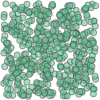

In [155]:
#| hide
datos_simples.get_Multypoint()

In [229]:
#| export

class Clusters:
    """Clase para generar los clusters a partir de un objeto de la clase data_points
    
    Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
    se almacena los datos en una estructura de datos y se le añaden las respectivas 
    classes
    """
    
    def __init__(self, data_points_i, seed=1234):
        
        if seed != None:
            random.seed(seed)
        
        self.data_structure =  data_points_i

    def KMeans(self, **kwargs):
        """Se usa el algoritmo Kmeans para la obtencion de clusters"""
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  kmeans_c
        

    def DBSCAN(self, **kwargs):
        """Use DBSCAN para la obtencion de clusters clusters"""
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  db
    
    
    def HDBSCAN(self, **kwargs):
        """Use HDBSCAN para la obtencion de clusters"""
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True : 
            return  hdb
        

    def OPTICS(self, **kwargs):
        """Se usa el algoritmo OPTICS para la obtencion de clusters"""
        optics=  OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  optics
        


In [235]:
show_doc(KMeans)

/home/miguel/miniconda3/envs/cursos/lib/python3.12/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section Attributes
  else: warn(msg)
/home/miguel/miniconda3/envs/cursos/lib/python3.12/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section See Also
  else: warn(msg)
/home/miguel/miniconda3/envs/cursos/lib/python3.12/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section Notes
  else: warn(msg)
/home/miguel/miniconda3/envs/cursos/lib/python3.12/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section Examples
  else: warn(msg)


---

### KMeans

>      KMeans (n_clusters=8, init='k-means++', n_init='auto', max_iter=300,
>              tol=0.0001, verbose=0, random_state=None, copy_x=True,
>              algorithm='lloyd')

K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n_clusters | int | 8 | The number of clusters to form as well as the number of<br>centroids to generate.<br><br>For an example of how to choose an optimal value for `n_clusters` refer to<br>:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`. |
| init | str | k-means++ | Method for initialization:<br><br>* 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k-means++ by making several trials at             each sampling step and choosing the best centroid among them.<br><br>* 'random': choose `n_clusters` observations (rows) at random from         data for the initial centroids.<br><br>* If an array is passed, it should be of shape (n_clusters, n_features)        and gives the initial centers.<br><br>* If a callable is passed, it should take arguments X, n_clusters and a        random state and return an initialization.<br><br>For an example of how to use the different `init` strategy, see the example<br>entitled :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`. |
| n_init | str | auto | Number of times the k-means algorithm is run with different centroid<br>seeds. The final results is the best output of `n_init` consecutive runs<br>in terms of inertia. Several runs are recommended for sparse<br>high-dimensional problems (see :ref:`kmeans_sparse_high_dim`).<br><br>When `n_init='auto'`, the number of runs depends on the value of init:<br>10 if using `init='random'` or `init` is a callable;<br>1 if using `init='k-means++'` or `init` is an array-like.<br><br>.. versionadded:: 1.2<br>   Added 'auto' option for `n_init`.<br><br>.. versionchanged:: 1.4<br>   Default value for `n_init` changed to `'auto'`. |
| max_iter | int | 300 | Maximum number of iterations of the k-means algorithm for a<br>single run. |
| tol | float | 0.0001 | Relative tolerance with regards to Frobenius norm of the difference<br>in the cluster centers of two consecutive iterations to declare<br>convergence. |
| verbose | int | 0 | Verbosity mode. |
| random_state | NoneType | None | Determines random number generation for centroid initialization. Use<br>an int to make the randomness deterministic.<br>See :term:`Glossary <random_state>`. |
| copy_x | bool | True | When pre-computing distances it is more numerically accurate to center<br>the data first. If copy_x is True (default), then the original data is<br>not modified. If False, the original data is modified, and put back<br>before the function returns, but small numerical differences may be<br>introduced by subtracting and then adding the data mean. Note that if<br>the original data is not C-contiguous, a copy will be made even if<br>copy_x is False. If the original data is sparse, but not in CSR format,<br>a copy will be made even if copy_x is False. |
| algorithm | str | lloyd | K-means algorithm to use. The classical EM-style algorithm is `"lloyd"`.<br>The `"elkan"` variation can be more efficient on some datasets with<br>well-defined clusters, by using the triangle inequality. However it's<br>more memory intensive due to the allocation of an extra array of shape<br>`(n_samples, n_clusters)`.<br><br>.. versionchanged:: 0.18<br>    Added Elkan algorithm<br><br>.. versionchanged:: 1.1<br>    Renamed "full" to "lloyd", and deprecated "auto" and "full".<br>    Changed "auto" to use "lloyd" instead of "elkan". |

In [232]:
show_doc(Clusters.KMeans)

---

### Clusters.KMeans

>      Clusters.KMeans (**kwargs)

Use Kmeans to obtain the clusters

In [234]:
show_doc(Clusters.DBSCAN)

---

### Clusters.DBSCAN

>      Clusters.DBSCAN (**kwargs)

Use DBSCAN to obtain clusters

In [233]:
show_doc(Clusters.HDBSCAN)

---

### Clusters.HDBSCAN

>      Clusters.HDBSCAN (**kwargs)

Use HDBSCAN to obtain the clusters

In [228]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (**kwargs)

In [ ]:
show_doc(Clusters.OPTICS)

In [157]:
#| hide 
cluster_all  = Clusters(datos_simples)
cluster_all.KMeans()

In [158]:
#| hide
cluster_all.data_structure.classes_Kmeans

array([5, 4, 1, 1, 0, 2, 0, 3, 4, 4, 5, 2, 7, 3, 2, 3, 7, 7, 4, 6, 0, 6,
       7, 7, 7, 2, 0, 4, 1, 4, 4, 7, 3, 3, 2, 1, 2, 5, 1, 0, 6, 5, 6, 2,
       2, 2, 0, 3, 7, 7, 1, 6, 0, 3, 4, 1, 1, 6, 5, 6, 1, 7, 1, 0, 3, 4,
       2, 1, 6, 1, 0, 3, 1, 2, 6, 2, 7, 7, 6, 5, 4, 5, 6, 0, 7, 5, 4, 4,
       1, 4, 3, 7, 2, 1, 1, 2, 6, 3, 6, 3, 1, 5, 2, 4, 2, 7, 5, 7, 7, 5,
       3, 6, 3, 6, 2, 1, 3, 1, 4, 0, 1, 0, 3, 1, 4, 3, 3, 0, 4, 0, 7, 1,
       4, 0, 0, 1, 2, 4, 5, 0, 4, 0, 6, 5, 4, 3, 1, 7, 4, 4, 1, 1, 7, 4,
       7, 2, 5, 1, 5, 1, 3, 4, 7, 2, 7, 4, 7, 3, 6, 1, 6, 3, 3, 4, 3, 4,
       5, 5, 2, 4, 7, 4, 6, 4, 4, 1, 4, 2, 4, 4, 2, 4, 0, 3, 6, 1, 1, 5,
       2, 4, 3, 6, 7, 7, 5, 5, 0, 1, 0, 5, 3, 6, 5, 1, 1, 2, 4, 2, 5, 1,
       5, 5, 3, 3, 7, 2, 4, 7, 6, 7, 0, 7, 1, 1, 4, 7, 4, 2, 7, 3, 2, 5,
       3, 2, 5, 2, 7, 3, 5, 2, 3, 7, 1, 3, 5, 2, 2, 5, 2, 5, 7, 4, 6, 3,
       6, 2, 1, 2, 2, 0, 0, 3, 4, 6, 7, 6, 1, 1, 2, 4, 2, 3, 2, 5, 7, 6,
       4, 1, 0, 1, 7, 4, 3, 7, 1, 1, 0, 3, 2, 4, 7,

In [159]:
#| hide 
cluster_all.DBSCAN(eps=0.01, min_samples=10)

In [160]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [161]:
#| hide
cluster_all.HDBSCAN()

In [162]:
#| hide
cluster_all.data_structure.classes_DBSCAN

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [163]:
#| hide
cluster_all.OPTICS()

In [164]:
#| hide
cluster_all.data_structure.classes_OPTICS

array([ 0,  9, -1,  1, 12, 17, 16, -1, -1, -1, -1, 18, -1, 27, -1, -1,  4,
       21, -1, 24, 13, 24, -1, 25, 25, -1, -1, -1,  5, -1, -1, -1,  5, -1,
       -1,  1, -1, -1, -1, 12, 24, -1,  3, -1, -1, -1, -1, 27, -1, 21, -1,
       -1, 12, -1, 21,  5, -1, 23, -1, 22, -1, -1,  1, -1, 27,  8, -1, -1,
       -1, -1, 13,  5, -1, -1, 24, -1, -1, -1, -1, -1,  9, -1, -1, 16, -1,
       -1, -1,  7, -1,  8, -1, -1, 14, -1, -1, 18, -1,  5, -1, 22, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, 27, -1, 14,  2,  5, -1, -1,
       13,  3, 20, -1,  5, -1, 27, -1, 12, -1, -1, -1,  2, -1, -1, -1,  1,
       17,  7, -1, 20,  7, 16, 24, 26, -1, 27,  5, -1, 10,  7, -1, -1, -1,
       -1,  4, -1, -1, -1, -1, -1, 20, 10, -1, -1, -1,  7, -1, -1, -1, -1,
       -1, -1, 27, 21, -1, -1, -1, -1, 14, 10, 19,  7, 24,  8, 21, -1,  8,
       -1, 10, -1, -1, -1, 12,  6, -1,  1,  2, -1, -1, -1, 20,  3, -1, -1,
        0, -1, 12,  5, 16, -1, -1, 24, -1, -1,  1, 14,  9, -1, 26, -1, 26,
       -1, -1, -1, -1, -1

## Ejemplo uso clusterizaciones 

Creamos un conjunto de datos usando los distintos metodos en las clases que ya hicimos. 

In [165]:
datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0, max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4, max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0, max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4, max_y= 0.4 )

Añadios los puntos en un sólo objeto

In [166]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)


Veamos los puntos en el objeto `datos_simples_0`

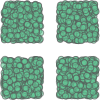

In [167]:
datos_simples_0.get_Multypoint()

In [169]:
cluster_all  = Clusters(datos_simples_0)

In [170]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

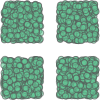

In [171]:
cluster_all.data_structure.get_Multypoint()

In [200]:
len(np.unique(cluster_all.data_structure.classes_DBSCAN))

4

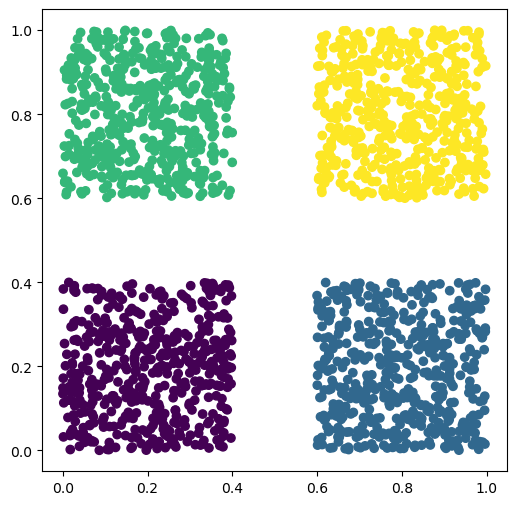

In [224]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
color_map = matplotlib.colormaps['viridis'].resampled(len(np.unique(cluster_all.data_structure.classes_DBSCAN)))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster_all.data_structure.classes_DBSCAN)))]
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_DBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

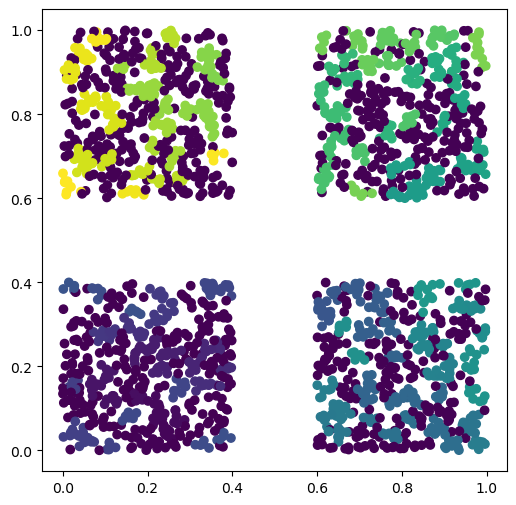

In [225]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_OPTICS
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

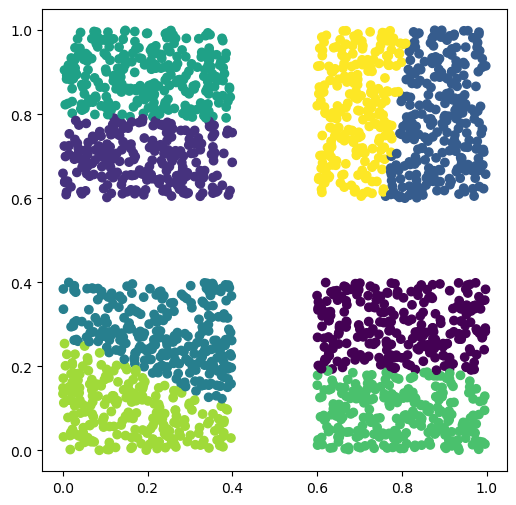

In [226]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_Kmeans
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

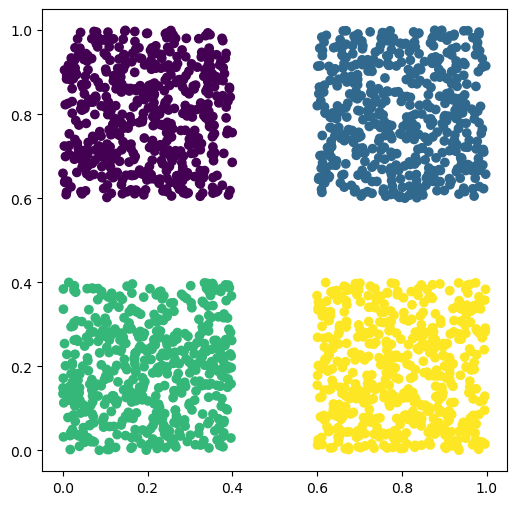

In [227]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_HDBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

In [22]:
#| hide
import nbdev; nbdev.nbdev_export()